In [ ]:
# Video Game Sales Dataset

In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data set

vg_df = pd.read_csv("video_game_sales.csv")
vg_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Check for missing values 

vg_df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [4]:
vg_df.isnull().sum()

# 271 missing from year // 58 from Publisher

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
# Inspect the dataset

vg_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
vg_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
# Breakdown of count by Genre

vg_df["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
# Cleaning data

In [8]:
# Removing the decimal point in the "Year" column

vg_df["Year"] = vg_df["Year"].map("{:.0f}".format)

In [15]:
vg_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# Creating new column -> Percentage of Global Sales that are from North America

vg_df["%_Of_Sales_NA"] = vg_df["NA_Sales"]/vg_df["Global_Sales"]*100
vg_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,%_Of_Sales_NA
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.145033
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.266402
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.249023
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.727273
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.926044


In [10]:
# Formatting the decimals to hundreths for % of total sales that take occur in North America

vg_df["%_Of_Sales_NA"] = vg_df["%_Of_Sales_NA"].map("{:.2f}".format)

In [11]:
vg_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,%_Of_Sales_NA
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.15
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.27
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.25
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.73
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.93


In [12]:
# Looking deeper at the platforms

vg_df["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [13]:
vg_df.dtypes

Rank               int64
Name              object
Platform          object
Year              object
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
%_Of_Sales_NA     object
dtype: object

In [14]:
##### Make Top 250 DataFrame ######

top_vgdf = vg_df.head(250)
top_vgdf.tail(5)

######      #########        ######

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,%_Of_Sales_NA
245,246,God of War,PS2,2005,Action,Sony Computer Entertainment,2.71,1.29,0.02,0.43,4.45,60.90
246,247,Nintendo Land,WiiU,2012,Misc,Nintendo,2.55,1.11,0.46,0.33,4.44,57.43
247,248,Michael Jackson: The Experience,Wii,2010,Misc,Ubisoft,2.67,1.35,0.01,0.39,4.42,60.41
248,249,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,2.66,1.29,0.01,0.46,4.41,60.32
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39,2.28


In [15]:
# Visualizations with Seaborn
import matplotlib.style as style

In [16]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
# Set Seaborn Theme

# sns.set_style("Solarize_Light2") -> Why won't this work?

sns.set_style("darkgrid")

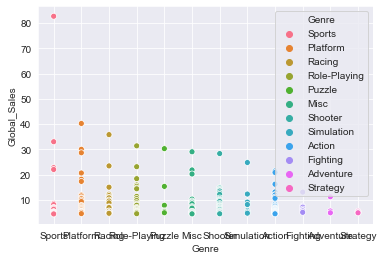

In [26]:
# Bar chart for genre and 

sns.scatterplot(x= top_vgdf.Genre, y=top_vgdf.Global_Sales, hue= top_vgdf.Genre, data= top_vgdf)

In [32]:
top_vgdf["Genre"].value_counts()

# Top 8 all have 20 < entries 

Action          51
Shooter         38
Platform        34
Role-Playing    34
Sports          24
Racing          20
Misc            20
Fighting         8
Simulation       8
Puzzle           7
Adventure        3
Strategy         3
Name: Genre, dtype: int64

In [33]:
# making a new DF with top 250 but also top 8 Genres

top_dfgenre = top_vgdf

In [34]:
# # will remap the values 
# dict = {'Music' : 'M', 'Poetry' : 'P', 'Theatre' : 'T', 'Comedy' : 'C'} 
  
# # Print the dictionary 
# print(dict) 
  
# # Remap the values of the dataframe 
# df['Event']= df['Event'].map(dict) 

dict = {"Action" : 1, "Shooter" : }

TypeError: '>=' not supported between instances of 'str' and 'int'